# 二次元配列と勾配問題

【問題1】1次関数

In [2]:
import numpy as np

initial = -50
y_list = []

number_list = [-50]
for _ in range(1000):
    number_list.append(number_list[-1]+0.1)
    
number_array = np.array(number_list).reshape(-1,1)
np.set_printoptions(precision=1)

for k in number_array:
    y  = k / 2 + 1
    y_list.append(y)
    
y_array = np.array(y_list).reshape(-1,1)

print('x範囲の配列:', number_array)
print('y値の配列:', y_array)

x範囲の配列: [[-50. ]
 [-49.9]
 [-49.8]
 ...
 [ 49.8]
 [ 49.9]
 [ 50. ]]
y値の配列: [[-24. ]
 [-23.9]
 [-23.9]
 ...
 [ 25.9]
 [ 26. ]
 [ 26. ]]


【問題2】配列の結合

In [3]:
merge_array = np.concatenate([number_array, y_array], axis=1)
merge_array

array([[-50. , -24. ],
       [-49.9, -23.9],
       [-49.8, -23.9],
       ...,
       [ 49.8,  25.9],
       [ 49.9,  26. ],
       [ 50. ,  26. ]])

【問題3】勾配を求める

In [4]:
a = number_array[1:]
b = number_array[:-1]
x_henka = a - b
c = y_array[1:]
d = y_array[:-1]
y_henka = c - d
grad = y_henka / x_henka
grad = grad.reshape(-1)
print('勾配（次元）:', grad.shape)
# print('勾配:', grad)

勾配（次元）: (1000,)


【問題4】グラフを描く

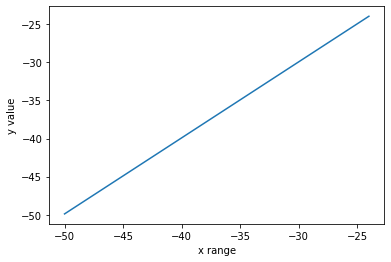

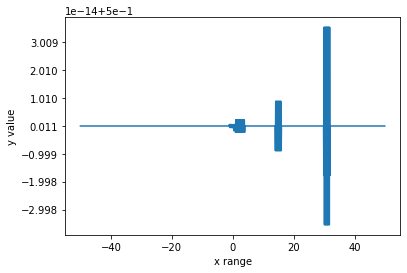

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.xlabel('x range')
plt.ylabel('y value')
plt.plot(merge_array[0], merge_array[1])
plt.show()

plt.xlabel('x range')
plt.ylabel('y value')
plt.plot(merge_array[:-1,0], grad)
plt.show()

【問題5】Pythonの関数化

In [22]:
def compute_gradient(function, x_range=(-50, 50.1, 0.1)):
    """
    変化量を使い勾配を計算する。

    Parameters
    ----------------
    function : function
      求めたい関数、xのndarrayを入れるとyのndarrayを返すもの。
    x_range : tuple
      np.arange()の引数と同じ方法で範囲を指定する。

    Returns
    ----------------
    array_xy : ndarray, shape(n, 2)
      xとyを結合したもの。nはx_rangeに依存する。
    gradient : ndarray, shape(n-1,)
      関数の勾配。差をとるため要素は1つ減る
    """
    y_list = []
    x_range_array = np.arange(*x_range)
        
    x_range_array = np.array(x_range_array).reshape(-1,1)
    y_array = function(x_range_array)
    y_array = y_array.reshape(-1,1)
    
    array_xy = np.concatenate([x_range_array, y_array], axis=1)
    grad = (array_xy[1:, 1] - array_xy[:-1, 1]) / (array_xy[1:, 0] - array_xy[:-1, 0])
    grad = grad.reshape(-1)
    
    return array_xy, grad

def function1(array):
    return array**2

def function2(array):
    return 2 * array**2 + 2**array

def function3(array):
    return np.sin(array**0.5)


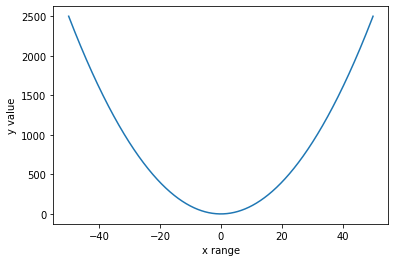

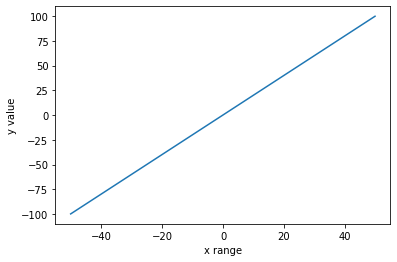

In [27]:
func1_array_xy, func1_gradient = compute_gradient(function1)

plt.xlabel('x range')
plt.ylabel('y value')
plt.plot(func1_array_xy[:,0], func1_array_xy[:,1])
plt.show()

plt.xlabel('x range')
plt.ylabel('y value')
plt.plot(func1_array_xy[:-1,0], func1_gradient)
plt.show()

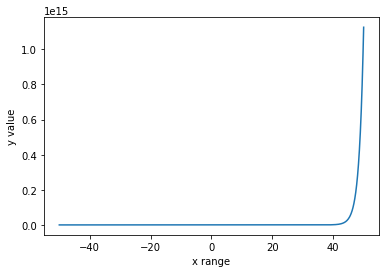

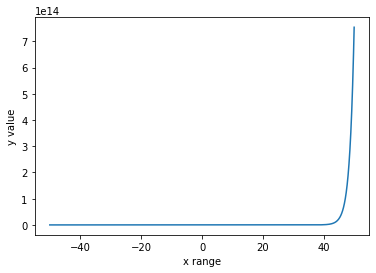

In [28]:
func2_array_xy, func2_gradient = compute_gradient(function2)

plt.xlabel('x range')
plt.ylabel('y value')
plt.plot(func2_array_xy[:,0], func2_array_xy[:,1])
plt.show()

plt.xlabel('x range')
plt.ylabel('y value')
plt.plot(func2_array_xy[:-1,0], func2_gradient)
plt.show()

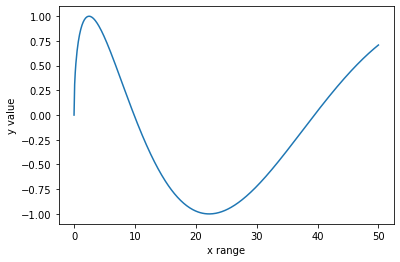

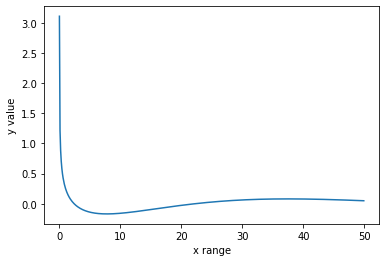

In [29]:
func3_array_xy, func3_gradient = compute_gradient(function3, x_range=(0, 50.1, 0.1))

plt.xlabel('x range')
plt.ylabel('y value')
plt.plot(func3_array_xy[:,0], func3_array_xy[:,1])
plt.show()

plt.xlabel('x range')
plt.ylabel('y value')
plt.plot(func3_array_xy[:-1,0], func3_gradient)
plt.show()

【問題6】最小値を求める

In [34]:
print('function1の最小値yは{}'.format(func1_array_xy[:,1].min()))
print('function1の最小値のインデックスは{}'.format(func1_array_xy[:,1].argmin()))
print('function1の最小値yの前後の勾配は、前:{0} 後:{1}'.format(func1_gradient[func1_array_xy[:,1].argmin() - 1], \
                                                 func1_gradient[func1_array_xy[:,1].argmin() + 1]))

function1の最小値yは5.048709793414476e-25
function1の最小値のインデックスは500
function1の最小値yの前後の勾配は、前:-0.09999999999858034 後:0.30000000000142535


In [35]:
print('function2の最小値yは{}'.format(func2_array_xy[:,1].min()))
print('function2の最小値のインデックスは{}'.format(func2_array_xy[:,1].argmin()))
print('function2の最小値yの前後の勾配は、前:{0} 後:{1}'.format(func2_gradient[func2_array_xy[:,1].argmin() - 1], \
                                                 func2_gradient[func2_array_xy[:,1].argmin() + 1]))

function2の最小値yは0.9505505632959851
function2の最小値のインデックスは498
function2の最小値yの前後の勾配は、前:-0.4170183305979998 後:0.4696700846350943


In [36]:
print('function3の最小値yは{}'.format(func3_array_xy[:,1].min()))
print('function3の最小値のインデックスは{}'.format(func3_array_xy[:,1].argmin()))
print('function3の最小値yの前後の勾配は、前:{0} 後:{1}'.format(func3_gradient[func3_array_xy[:,1].argmin() - 1], \
                                                 func3_gradient[func3_array_xy[:,1].argmin() + 1]))

function3の最小値yは-0.9999997540298113
function3の最小値のインデックスは222
function3の最小値yの前後の勾配は、前:-0.0006388422559544435 後:0.0016061158921243152
